# Compare the analytical solution and the neural net mask

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import sys
sys.path.append("..")
from utils.model3 import Net_mask
from utils.data import Data
from scripts.parameters import get_parameters, get_parameters_2
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal

In [54]:
model1 = Net_mask()
model2 = Net_mask()
model3 = Net_mask()
run = 1
outer_folder = 'combined2'
name1 = '../saved_models/' + str(outer_folder) + '/map/' + str(run) + '/model_weights.pth'
name2 = '../saved_models/' + str(outer_folder) + '/pos/' + str(run) + '/model_weights.pth'
name3 = '../saved_models/' + str(outer_folder) + '/neg/' + str(run) + '/model_weights.pth'
model1.load_state_dict(torch.load(name1))
model2.load_state_dict(torch.load(name2))
model3.load_state_dict(torch.load(name3))
model1.eval()
model2.eval()
model3.eval()

Net_mask(
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [55]:
tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps, tensor_Q_m, sigma2_eps, tau2 = get_parameters()
data = Data(tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps)

In [56]:
tensor_data = data.get_tensor_data(1, num=4)
#tensor_data = data.get_tensor_data(1, [0.4, -0.15, -0.3, 0.6],[4, 5, 8, 9]) # 1
#tensor_data = data.get_tensor_data(1, [-0.2, -1.4, -0.6, -0.2],[1, 3, 5, 6]) # 2
#tensor_data = data.get_tensor_data(1, [-1.4, -0.3, -1, 0.3], [0, 4, 7, 8]) # 3
#tensor_data = data.get_tensor_data(1, [1, 2, 1.7, 0.4], [1, 2, 6, 8]) # 4
post, _ = data.get_tensor_posterior(tensor_data[0])
out_raw1 = model1(tensor_data)
out_raw2 = model2(tensor_data)
out_raw3 = model3(tensor_data)
out1 = out_raw1[0].detach().numpy()
out2 = out_raw2[0].detach().numpy()
out3 = out_raw3[0].detach().numpy()
mask = tensor_data[0][10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]
points = tensor_data[0][location_raw]

(0.0, 10.0, -3.0, 3.0)

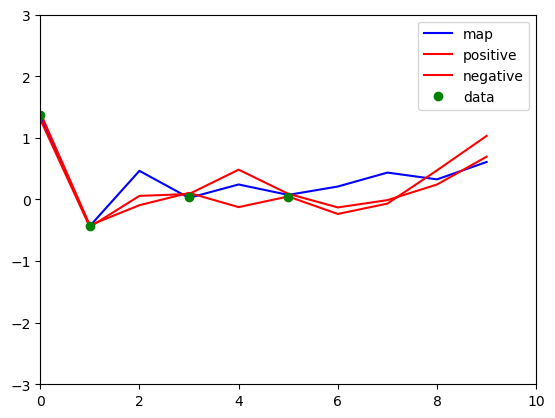

In [57]:
#plt.plot(range(10), post, 'b')
plt.plot(range(10), out1, 'b')
plt.plot(range(10), out2, 'r')
plt.plot(range(10), out3, 'r')
plt.plot(location, points, 'go')
plt.legend(['map', 'positive', 'negative', 'data'])
plt.axis([0,10,-3,3])
#plt.savefig('../figures/anti_samp4.pdf')
#print(tensor_data)
#tensor_data = data.get_tensor_data(1, [0.4, -0.15, -0.3, 0.6],[4, 5, 8, 9]) # 1
#tensor_data = data.get_tensor_data(1, [-0.2, -1.4, -0.6, -0.2],[1, 3, 5, 6]) # 2
#tensor_data = data.get_tensor_data(1, [-1.4, -0.3, -1, 0.3], [0, 4, 7, 8]) # 3
#tensor_data = data.get_tensor_data(1, [1, 2, 1.7, 0.4], [1, 2, 6, 8]) # 4